In [ ]:
pip install nilearn

In [ ]:
pip install SimpleITK

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from skimage import exposure
from PIL import Image
import matplotlib.pyplot as plt
import nibabel as nib

In [ ]:
# Load NIfTI image
nii = nib.load("/content/43-T2.nii")

In [ ]:
# Get image data as a NumPy array
arr = nii.get_fdata()

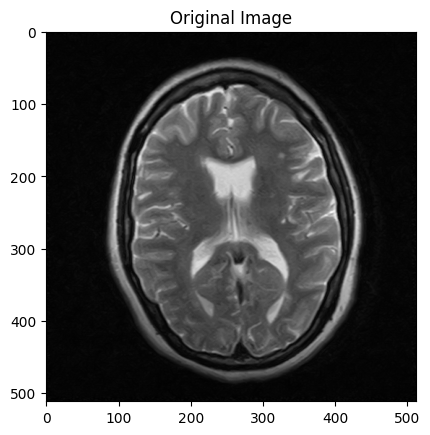

In [ ]:
# Display original image
plt.imshow(arr[:,:,arr.shape[2]//2], cmap='gray')
plt.title('Original Image')
plt.show()

In [ ]:
# Apply intensity normalization
arr_norm = exposure.equalize_hist(arr)

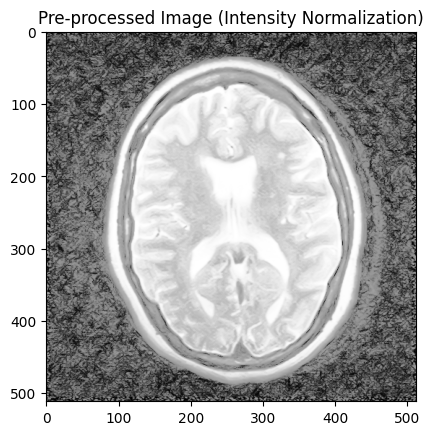

In [ ]:
# Display pre-processed image
plt.imshow(arr_norm[:,:,arr_norm.shape[2]//2], cmap='gray')
plt.title('Pre-processed Image (Intensity Normalization)')
plt.show()

In [ ]:
from skimage import filters

In [ ]:
# Apply denoising
arr_denoised = filters.median(arr)


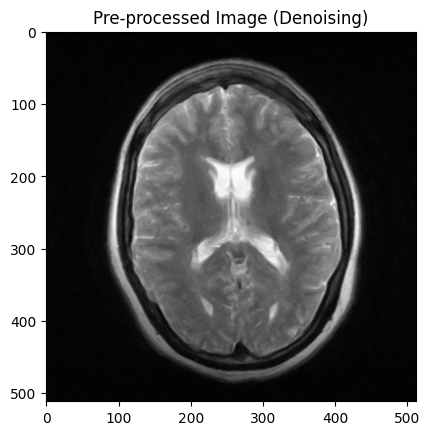

In [ ]:
# Display pre-processed image
plt.imshow(arr_denoised[:,:,arr_denoised.shape[2]//2], cmap='gray')
plt.title('Pre-processed Image (Denoising)')
plt.show()

In [ ]:
from skimage import morphology

In [ ]:
import nibabel as nib
import numpy as np
import scipy.ndimage as ndimage
import matplotlib.pyplot as plt

In [ ]:
# Compute the median intensity of the brain
brain_median = np.median(arr[arr > 0])
# Create a binary mask of the brain
brain_mask = arr > brain_median * 5


In [ ]:
# Smooth the mask with a 3D Gaussian filter
sigma = [3, 3, 3]
brain_mask = ndimage.gaussian_filter(brain_mask.astype(float), sigma=sigma)

# Multiply the image with the mask to remove the skull
arr_stripped = arr * brain_mask


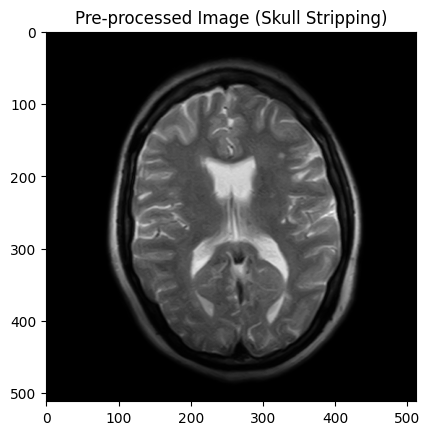

In [ ]:
# Display skull-stripped image
plt.imshow(arr_stripped[:, :, arr_stripped.shape[2]//2], cmap='gray')
plt.title('Pre-processed Image (Skull Stripping)')
plt.show()

In [ ]:
import SimpleITK as sitk

In [ ]:
pip install SimpleITK

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 18.6 MB/s eta 0:00:00


In [ ]:
# Load the NIfTI file
nifti_file = sitk.ReadImage('/content/43-T2.nii')

In [ ]:
# Convert the image to a NumPy array
image_array = sitk.GetArrayFromImage(nifti_file)



In [ ]:
# Perform segmentation using a SimpleITK filter
segmentation_filter = sitk.ConnectedThresholdImageFilter()
segmentation_filter.SetLower(0)
segmentation_filter.SetUpper(200)

# Set the seed point using AddSeed()
seed = [50, 50, 50]
segmentation_filter.AddSeed(seed)

segmentation_image = segmentation_filter.Execute(nifti_file)



In [ ]:
# Perform segmentation using a SimpleITK filter
segmentation_filter = sitk.ConnectedThresholdImageFilter()
segmentation_filter.SetLower(0)
segmentation_filter.SetUpper(200)

# Set the seed point using AddSeed()
seed = [50, 50, 50]
segmentation_filter.AddSeed(seed)

# Smooth the image using a curvature flow filter
smoothing_filter = sitk.CurvatureFlowImageFilter()
smoothing_filter.SetNumberOfIterations(5)
smoothing_filter.SetTimeStep(0.125)
smoothed_image = smoothing_filter.Execute(nifti_file)

Text(0.5, 1.0, 'Original Image')

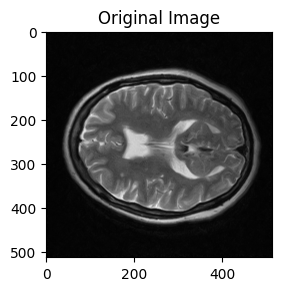

In [ ]:
# Display the original and segmented images side-by-side
plt.subplot(1, 2, 1)
plt.imshow(image_array[9,:,:], cmap='gray')
plt.title('Original Image')

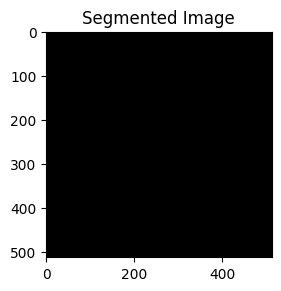

In [ ]:
plt.subplot(1, 2, 2)
plt.imshow(sitk.GetArrayFromImage(segmentation_image)[9,:,:], cmap='gray')
plt.title('Segmented Image')
plt.show()